#load libraries and modules


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split # splits arrays or matrices into random train and test subsets


# a. Implementing EDA and Baseline Models

###EDA

In [3]:
df = pd.read_excel("./HW4.xlsx", sheet_name=0, header=0)
df.head(10)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00
5,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1995,2002,0,0,1,0,0.06
6,7,1,0,0,0,0,0,0,0,0,...,0,1,2,1498,1529,0,0,1,0,0.06
7,8,1,0,0,1,0,0,0,0,0,...,0,0,1,3397,3397,0,1,0,0,0.08
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,488.50
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,173.50


In [ ]:
# Describe the data for central tendency and other statistical descriptions
# for display/output format purpose we turn the descriptions result into a dataframe so that we can see the results for each column
summary_stats = pd.DataFrame(df.describe())
print(summary_stats[summary_stats.columns[:15]])
print(summary_stats[summary_stats.columns[15:]])

       sequence_number           US     source_a     source_c     source_b  \
count      2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean       1000.500000     0.824500     0.126500     0.056000     0.060000   
std         577.494589     0.380489     0.332495     0.229979     0.237546   
min           1.000000     0.000000     0.000000     0.000000     0.000000   
25%         500.750000     1.000000     0.000000     0.000000     0.000000   
50%        1000.500000     1.000000     0.000000     0.000000     0.000000   
75%        1500.250000     1.000000     0.000000     0.000000     0.000000   
max        2000.000000     1.000000     1.000000     1.000000     1.000000   

          source_d     source_e    source_m     source_o     source_h  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean      0.041500     0.151000     0.01650     0.033500     0.052500   
std       0.199493     0.358138     0.12742     0.179983     0.223089   
min  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sequence_number       2000 non-null   int64  
 1   US                    2000 non-null   int64  
 2   source_a              2000 non-null   int64  
 3   source_c              2000 non-null   int64  
 4   source_b              2000 non-null   int64  
 5   source_d              2000 non-null   int64  
 6   source_e              2000 non-null   int64  
 7   source_m              2000 non-null   int64  
 8   source_o              2000 non-null   int64  
 9   source_h              2000 non-null   int64  
 10  source_r              2000 non-null   int64  
 11  source_s              2000 non-null   int64  
 12  source_t              2000 non-null   int64  
 13  source_u              2000 non-null   int64  
 14  source_p              2000 non-null   int64  
 15  source_x             

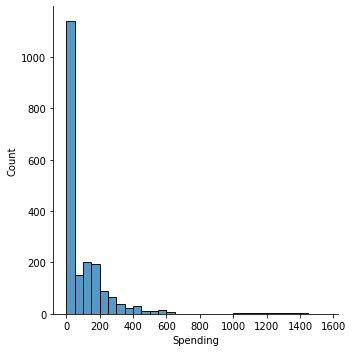

In [ ]:
sns.displot(df, x="Spending", binwidth=50)

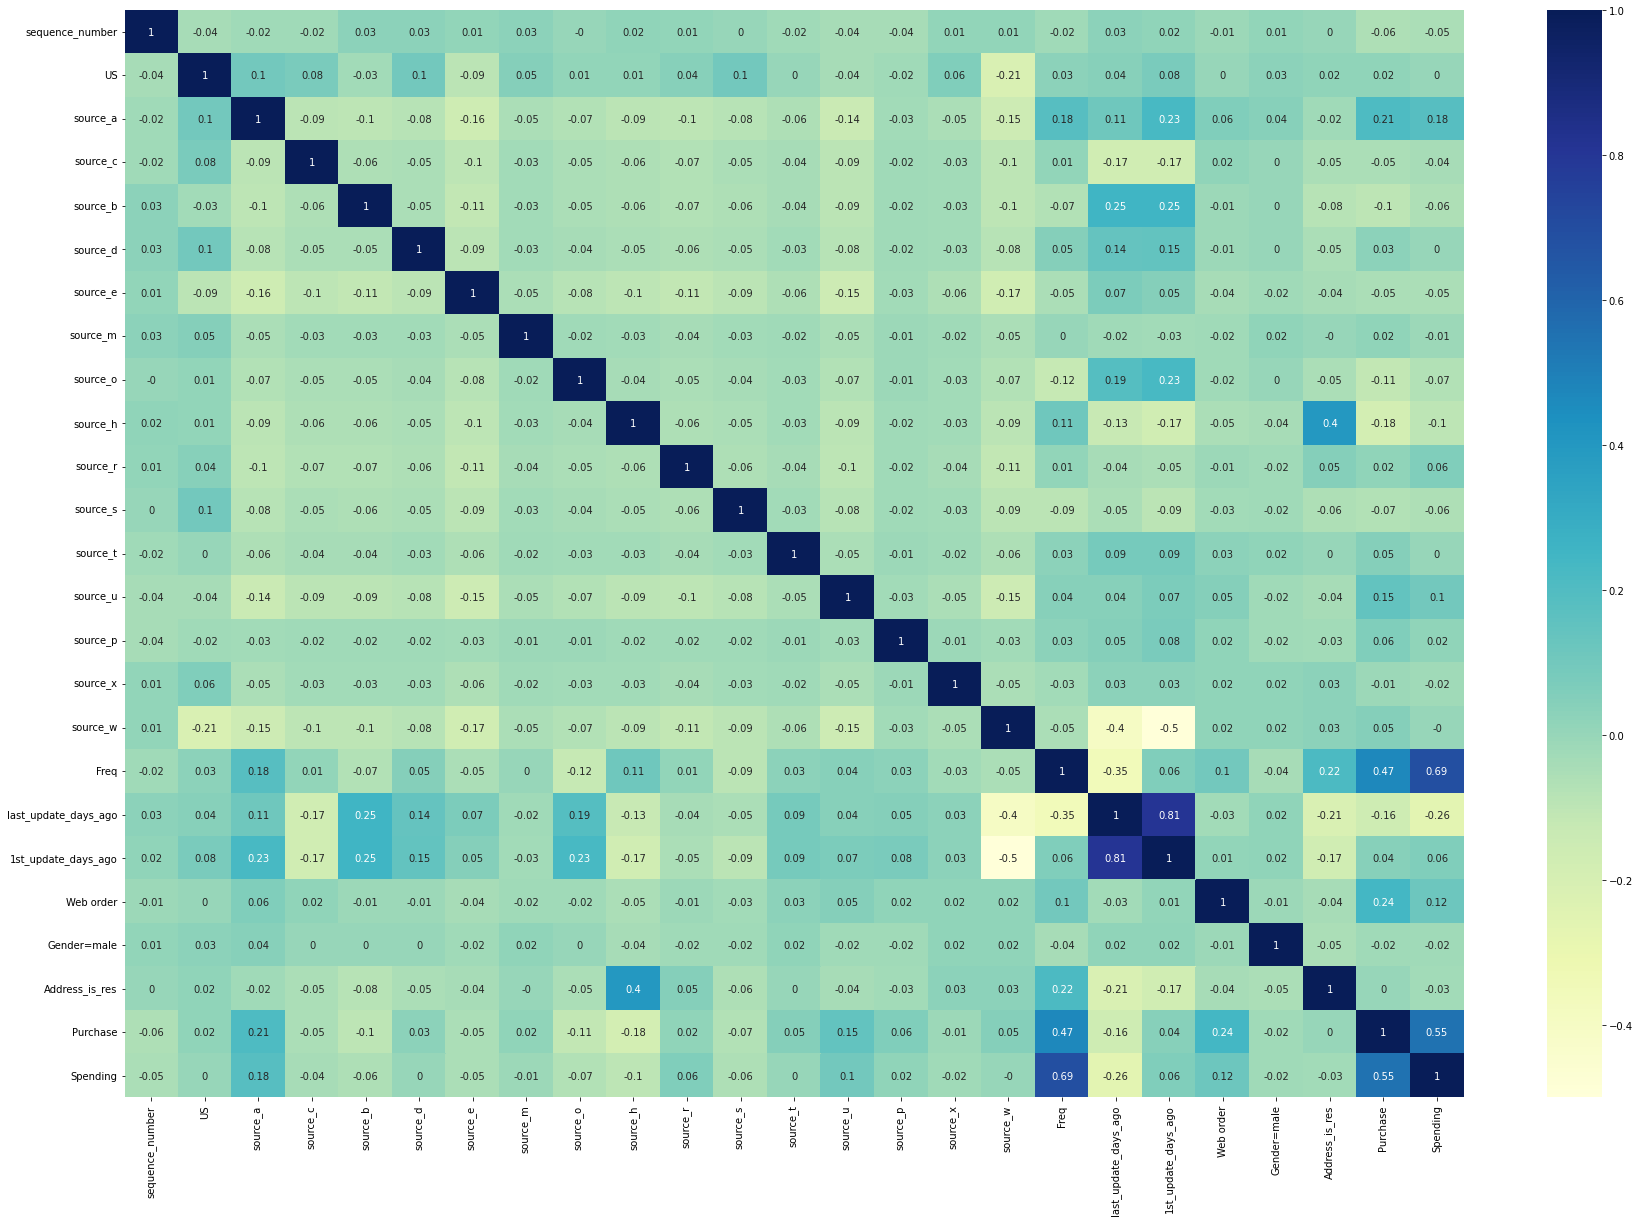

In [ ]:
# Correlation Matrix
plt.figure(figsize = (30,20))

p1 = round(df.corr(), 2)

sns.heatmap(p1,cmap="YlGnBu", annot=True)

###a.1 Multivariate Linear Regression Model


In [4]:
from sklearn.model_selection import train_test_split
X = df[df.columns[ df.columns != 'Spending']].values      # attributes
y = df['Spending'].values                                 # target variable

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state=42)

In [5]:
################################### Fit Simple Linear Regression Model ###################################

from sklearn.linear_model import LinearRegression     # ordinary least squares Linear Regression
from sklearn.model_selection import cross_val_score, GridSearchCV   # evaluate a score by cross-validation

# A linear regression with multiple features
# multiple linear regression class
mlr = LinearRegression(fit_intercept=True,            # whether to calculate the intercept for this model (true by default, otherwise data is expected to be centered)
                       n_jobs=-1)                     # speedup computations by using multiple processors; -1 means use all processors      
mlr.fit(X, y)

#Outer CV
scores = cross_val_score(mlr,                                              # cross-validation scores
                         X, 
                         y,
                         scoring='neg_mean_squared_error', # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"Slopes:\n {mlr.coef_}")                   # estimated coefficients for the linear regression model
print(f"Intercept:\n {mlr.intercept_}")             # estimated intercept for the linear regression model
print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)) # estimate mean and variance from cross validation metrics

Slopes:
 [-4.56774359e-03 -7.40483130e+00 -3.50148285e+00 -5.63762559e+01
 -1.24245505e+01 -4.38189791e+01 -2.23893219e+01 -3.85902600e+01
  1.36402367e+01 -7.66059914e+01  1.61403016e+01 -2.16583335e+01
 -4.23863004e+01 -2.45448284e+00 -5.81550406e+01 -1.58703726e+01
 -2.12615622e+01  7.73611642e+01 -1.55763782e-02  5.82365505e-03
 -3.35465991e+00 -1.58239877e+00 -6.36110845e+01  9.17879335e+01]
Intercept:
 11.843131581078296

 Cross Validation Scores(neg_mean_squared_error):
[-13691.3433862  -34526.53238019 -16803.58093127 -11748.19567626
 -17323.62122884 -10962.28569609  -8928.96710438  -7663.55653107
 -13396.82094557 -15671.17351217]


 Statistics of Cross Validation Performance: -15071.61 (+/- 14313.32)


In [ ]:
################################### Fit Simple Linear Regression Model ###################################

from sklearn.linear_model import LinearRegression     # ordinary least squares Linear Regression
from sklearn.model_selection import cross_val_score, GridSearchCV   # evaluate a score by cross-validation

# A linear regression with multiple features
# multiple linear regression class
mlr = LinearRegression(fit_intercept=True,            # whether to calculate the intercept for this model (true by default, otherwise data is expected to be centered)
                       n_jobs=-1)                     # speedup computations by using multiple processors; -1 means use all processors      
mlr.fit(X, y)

#Outer CV
scores = cross_val_score(mlr,                                              # cross-validation scores
                         X, 
                         y,
                         scoring='neg_mean_squared_error', # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"Slopes:\n {mlr.coef_}")                   # estimated coefficients for the linear regression model
print(f"Intercept:\n {mlr.intercept_}")             # estimated intercept for the linear regression model
print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)) # estimate mean and variance from cross validation metrics

Slopes:
 [-4.56774359e-03 -7.40483130e+00 -3.50148285e+00 -5.63762559e+01
 -1.24245505e+01 -4.38189791e+01 -2.23893219e+01 -3.85902600e+01
  1.36402367e+01 -7.66059914e+01  1.61403016e+01 -2.16583335e+01
 -4.23863004e+01 -2.45448284e+00 -5.81550406e+01 -1.58703726e+01
 -2.12615622e+01  7.73611642e+01 -1.55763782e-02  5.82365505e-03
 -3.35465991e+00 -1.58239877e+00 -6.36110845e+01  9.17879335e+01]
Intercept:
 11.843131581078296

 Cross Validation Scores(R-squares):
[-13691.3433862  -34526.53238019 -16803.58093127 -11748.19567626
 -17323.62122884 -10962.28569609  -8928.96710438  -7663.55653107
 -13396.82094557 -15671.17351217]


 Statistics of Cross Validation Performance: -15071.61 (+/- 14313.32)


Evaluate multivariate linear regression model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train_pred = mlr.predict(X_train)                   # apply model to train data (in sample performance)
y_test_pred = mlr.predict(X_test)                     # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

MSE train: 14520.069, MSE test: 14829.884
MAE train: 69.945, MAE test: 67.281


###a.2   KNN

In [6]:
############################################# Train the Model #############################################

from sklearn import neighbors

# KNeighborsRegressor is a numeric predictor implementing the k-nearest neighbors average.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Set parameters of KNeighborsClassifier
knnReg = neighbors.KNeighborsRegressor(n_neighbors=5, # n_neighbors is the k in the kNN
                        p=2,                     # power parameter for the Minkowski metric. We used p = 2, 
                        metric='minkowski',      # the default metric is minkowski, which is a generalization of the Euclidean distance
                                                    # with p=2 is equivalent to the standard Euclidean distance.
                                                    # with p=1 is equivalent to the Mahattan distance.
                        n_jobs=-1,               # the number of parallel jobs to run for neighbors search. -1 means using all processors
                        weights='distance')       # We choose 'distance' because we wanted to apply a similarity-moderated kNN
# Train the model      
knnReg.fit(X, y) 

################################# CROSS VALIDATION FOR KNN ##################################################
scores = cross_val_score(knnReg,                                              # cross-validation scores
                         X, 
                         y,
                         scoring='neg_mean_squared_error', # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


 Cross Validation Scores(neg_mean_squared_error):
[-35669.82745479 -51945.57148689 -31072.34303898 -22319.26166525
 -39948.81146301 -21973.55085935 -18969.59455752 -12205.59779847
 -26346.43090974 -30083.64831465]


 Statistics of Cross Validation Performance: -29053.46 (+/- 21725.64)


In [ ]:
############################################# Train the Model #############################################

from sklearn import neighbors

# KNeighborsRegressor is a numeric predictor implementing the k-nearest neighbors average.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Set parameters of KNeighborsClassifier
knnReg = neighbors.KNeighborsRegressor(n_neighbors=5, # n_neighbors is the k in the kNN
                        p=2,                     # power parameter for the Minkowski metric. We used p = 2, 
                        metric='minkowski',      # the default metric is minkowski, which is a generalization of the Euclidean distance
                                                    # with p=2 is equivalent to the standard Euclidean distance.
                                                    # with p=1 is equivalent to the Mahattan distance.
                        n_jobs=-1,               # the number of parallel jobs to run for neighbors search. -1 means using all processors
                        weights='distance')       # We choose 'distance' because we wanted to apply a similarity-moderated kNN
# Train the model      
knnReg.fit(X, y) 

################################# CROSS VALIDATION FOR KNN ##################################################
scores = cross_val_score(knnReg,                                              # cross-validation scores
                         X, 
                         y,
                         scoring='neg_mean_squared_error', # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


 Cross Validation Scores(neg_mean_squared_error):
[-35669.82745479 -51945.57148689 -31072.34303898 -22319.26166525
 -39948.81146301 -21973.55085935 -18969.59455752 -12205.59779847
 -26346.43090974 -30083.64831465]


 Statistics of Cross Validation Performance: -29053.46 (+/- 21725.64)


Evaluating the KNN regressor on the train 

In [ ]:
# Use the model to make in-sample and out_of_sample inference
y_train_pred = knnReg.predict(X_train)      # in-sample prediction
y_test_pred = knnReg.predict(X_test)        # out_of sample prediction

print('MSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

MSE train: 0.000, test: 29513.228
MAE train: 0.000, test: 99.403


### a.3 Regression Tree

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Instantiate the  decision tree regressor model
regTree = DecisionTreeRegressor(random_state=42)

# Train the model      
regTree.fit(X, y) 

scores = cross_val_score(regTree,                                              # cross-validation scores
                         X, 
                         y,
                         scoring='neg_mean_squared_error', # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # estimate mean and variance from cross validation metrics


 Cross Validation Scores(neg_mean_squared_error):
[-25982.3305495 -40767.9388455 -20780.2035985 -20354.4770155
 -19551.0335405 -47667.9100685 -21663.130696   -9141.429277
 -32132.81665   -24451.302715 ]


 Statistics of Cross Validation Performance: -26249.26 (+/- 21266.94)


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Instantiate the  decision tree regressor model
regTree = DecisionTreeRegressor(random_state=42)

# Train the model      
regTree.fit(X, y) 

scores = cross_val_score(regTree,                                              # cross-validation scores
                         X, 
                         y,
                         scoring='neg_mean_squared_error', # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # estimate mean and variance from cross validation metrics


 Cross Validation Scores(neg_mean_squared_error):
[-25982.3305495 -40767.9388455 -20780.2035985 -20354.4770155
 -19551.0335405 -47667.9100685 -21663.130696   -9141.429277
 -32132.81665   -24451.302715 ]


 Statistics of Cross Validation Performance: -26249.26 (+/- 21266.94)


Decision Tree Regressor Cross Validation

In [ ]:
# Use the model to make in-sample and out_of_sample inference
y_train_pred = regTree.predict(X_train)      # in-sample prediction
y_test_pred = regTree.predict(X_test)        # out_of sample prediction

print('MSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

MSE train: 0.000, test: 30104.140
MAE train: 0.000, test: 70.609


# b. Feature Engineering and Model Optimization

FEATURE ENGINEERING

We looked closely in the dataset and we have decided to create some new features and remove some irrelevant features. First of all, we have removed the sequence number because it is an index column presented as feature. The second, we create a new features from the last_update_days_ago and 1st_update_days_ago and the feature will be the difference between the two. We don't need to square it or apply the absolute because the features will contain non-negative values.

In [8]:
import numpy as np
new_df = df
new_df['days_until_update'] = np.log(df['1st_update_days_ago'] - df['last_update_days_ago']+1/3)
new_df['last_update_days_ago'] = np.log(new_df['last_update_days_ago'])
new_df = new_df.drop(['sequence_number', '1st_update_days_ago'], axis='columns')
new_df.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res',
       'Purchase', 'Spending', 'days_until_update'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X = new_df[new_df.columns[ new_df.columns != 'Spending']].values      # attributes
y = new_df['Spending'].values                                 # target variable. 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state=42)

# Since y is right skewed, we do the log transformation to traing
y_train_log = np.log(y_train + 1/3)
# Since y is right skewed, we do the log transformation to traing
y_log = np.log(y + 1/3)

### b.1 Improving Linear Regression Model

Multiple Linear Regression wth the new features.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# A linear regression with multiple features
# multiple linear regression class
mlr = LinearRegression(fit_intercept=True,            # whether to calculate the intercept for this model (true by default, otherwise data is expected to be centered)
                       n_jobs=-1)                     # speedup computations by using multiple processors; -1 means use all processors      
mlr.fit(X, y_log)

#Outer CV
scores = cross_val_score(mlr,                                              # cross-validation scores
                         X, 
                         y_log,
                         scoring='neg_mean_squared_error',              # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"Slopes:\n {mlr.coef_}")                   # estimated coefficients for the linear regression model
print(f"Intercept:\n {mlr.intercept_}")             # estimated intercept for the linear regression model
print(f"\n Cross Validation Scores(neg_mean_squared_error):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)) # estimate mean and variance from cross validation metrics


Slopes:
 [-7.47669916e-02  9.69730195e-02 -1.21867009e-01  4.55490947e-02
 -6.78771217e-03 -3.64179990e-02  3.24237686e-03 -1.83105554e-02
 -3.31628834e-01  4.49482093e-02 -1.60555568e-01 -2.44481110e-02
 -2.36471016e-02 -1.43965203e-01 -6.81910649e-02 -3.63332673e-02
  2.09968286e-01 -6.48596114e-02 -2.53821520e-02 -9.67969049e-03
 -1.47838989e-01  5.53718847e+00  3.14920305e-02]
Intercept:
 -0.5224052799313343

 Cross Validation Scores(neg_mean_squared_error):
[-0.26867163 -0.46840257 -0.28306759 -0.25736419 -0.33849702 -0.27778282
 -0.25002972 -0.25659741 -0.41991423 -0.34592955]


 Statistics of Cross Validation Performance: -0.32 (+/- 0.14)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# A linear regression with multiple features
# multiple linear regression class
mlr = LinearRegression(fit_intercept=True,            # whether to calculate the intercept for this model (true by default, otherwise data is expected to be centered)
                       n_jobs=-1)                     # speedup computations by using multiple processors; -1 means use all processors      
mlr.fit(X_train, y_train_log)

#Outer CV
scores = cross_val_score(mlr,                                              # cross-validation scores
                         X_train, 
                         y_train_log,
                         scoring='neg_mean_squared_error',              # optimizes for MSE 
                         cv=10)                                         # fit model to the data

print(f"Slopes:\n {mlr.coef_}")                   # estimated coefficients for the linear regression model
print(f"Intercept:\n {mlr.intercept_}")             # estimated intercept for the linear regression model
print(f"\n Cross Validation Scores(R-squares):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)) # estimate mean and variance from cross validation metrics

################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
#------------------------------------------------------------------------------------------------------------------
print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
y_train_pred = np.exp(mlr.predict(X_train)) - 1/3           # apply model to train data (in sample performance) and undo the log transformation
y_test_pred = np.exp(mlr.predict(X_test)) - 1/3             # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

Slopes:
 [-7.09092798e-02  9.61846804e-02 -1.49290821e-01  2.74652949e-02
 -2.17630856e-02 -5.68251469e-02 -1.35239749e-02 -2.59919958e-02
 -3.34595814e-01  4.87361281e-02 -2.23708107e-01  2.88278224e-02
 -7.29000950e-02 -1.86521219e-01 -5.87545987e-02 -1.78370053e-02
  2.04283940e-01 -6.34732750e-02 -1.09952308e-02 -5.08563129e-03
 -1.52331042e-01  5.50838185e+00  3.62623253e-02]
Intercept:
 -0.5284955790794803

 Cross Validation Scores(R-squares):
[-0.35882675 -0.29797386 -0.3931856  -0.27323076 -0.35558566 -0.33099814
 -0.15321666 -0.35889326 -0.34347557 -0.33582459]


 Statistics of Cross Validation Performance: -0.32 (+/- 0.13)
GENERAL PERFORMANCE EVALUATION
MSE train: 15877.895, MSE test: 15804.910
MAE train: 47.888, MAE test: 49.399


Linear Regression model with polynomial features

In [12]:
######################### Increasing Linear Regression Model Complexity    ########################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

inner_cv = KFold(n_splits=5, random_state=42, shuffle=True)
params = {'fit_intercept': [True, False]}

#normalize data with min max scaling
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(X)                                 # scaling parameters to be learned for later scaling

x_scaled = sc.transform(X)
x_sc = pd.DataFrame(x_scaled)


# Inner CV
mlr_poly = GridSearchCV(LinearRegression(), 
                        params, 
                        cv=inner_cv,
                        scoring='neg_mean_squared_error',              # optimizes for MSE (see note below)
                        n_jobs=-1)

for i in range(1,4):
    poly = PolynomialFeatures(degree=i)     # degree of polynomial features (degree=3)
    X_poly = poly.fit_transform(x_sc)  
    mlr_poly.fit(X_poly,y_log)

    print(f"\n POLYNOMIAL FEATURES: {i} \n=========================")
    print(mlr_poly.best_score_)
    print(mlr_poly.best_params_)
    print(mlr_poly.best_estimator_)

    # Outer CV
    nested_score_mlr_poly = cross_val_score(mlr_poly, 
                                        X=X_poly, 
                                        y=y_log, 
                                        scoring='neg_mean_squared_error', # optimizes for MSE (see note below)
                                        cv=10)
    print("Nested neg_mean_squared_error value is: ", nested_score_mlr_poly.mean(), " +/- ", 2*nested_score_mlr_poly.std()) # estimate mean and 2*std from cross validation metrics



 POLYNOMIAL FEATURES: 1 
-0.3164266567500608
{'fit_intercept': False}
LinearRegression(fit_intercept=False)
Nested neg_mean_squared_error value is:  -0.31662567259381946  +/-  0.143564152997299

 POLYNOMIAL FEATURES: 2 
-1.2888295336883152e+20
{'fit_intercept': False}
LinearRegression(fit_intercept=False)
Nested neg_mean_squared_error value is:  -1.8436080495744444e+20  +/-  1.079765540609907e+21

 POLYNOMIAL FEATURES: 3 
-626659855.7850544
{'fit_intercept': False}
LinearRegression(fit_intercept=False)
Nested neg_mean_squared_error value is:  -1.1597320011260398e+22  +/-  5.824768034778826e+22


In [ ]:
######################### Increasing Linear Regression Model Complexity    ########################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

inner_cv = KFold(n_splits=5, random_state=42, shuffle=True)
params = {'fit_intercept': [True, False]}

#normalize data with min max scaling
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(X_train)                                 # scaling parameters to be learned for later scaling

x_train_scaled = sc.transform(X_train)          # scaling of features in train data    
x_train_sc = pd.DataFrame(x_train_scaled)       # constructing dataFrame

x_test_scaled = sc.transform(X_test)            # scaling of features in test data 
x_test_sc = pd.DataFrame(x_test_scaled)         # constructing dataFrame

# Inner CV
mlr_poly = GridSearchCV(LinearRegression(), 
                        params, 
                        cv=inner_cv,
                        scoring='neg_mean_squared_error',              # optimizes for MSE (see note below)
                        n_jobs=-1)

for i in range(1,4):
    poly = PolynomialFeatures(degree=i)     # degree of polynomial features (degree=3)
    X_poly = poly.fit_transform(X_train)  
    mlr_poly.fit(X_poly,y_train_log)

    print(f"\n POLYNOMIAL FEATURES: {i} \n=========================")
    print(mlr_poly.best_score_)
    print(mlr_poly.best_params_)
    print(mlr_poly.best_estimator_)

    # Outer CV
    nested_score_mlr_poly = cross_val_score(mlr_poly, 
                                        X=X_train, 
                                        y=y_train, 
                                        scoring='neg_mean_squared_error', # optimizes for MSE (see note below)
                                        cv=10)
    print("Nested R-squared value is: ", nested_score_mlr_poly.mean(), " +/- ", 2*nested_score_mlr_poly.std())

    ################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
    #------------------------------------------------------------------------------------------------------------------
    print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
    y_train_pred = np.exp(mlr_poly.predict(X_poly)) - 1/3                               # apply model to train data (in sample performance)
    y_test_pred = np.exp(mlr_poly.predict(poly.fit_transform(X_test))) - 1/3         # apply model to test data with the polynomial features (out of sample performance)

    print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                    # y_test_pred: Estimated target values
    print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
            mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                    # y_test_pred: Estimated target values


 POLYNOMIAL FEATURES: 1 
-0.32172040279751507
{'fit_intercept': False}
LinearRegression(fit_intercept=False)
Nested R-squared value is:  -15041.280814773738  +/-  12264.88152070136
GENERAL PERFORMANCE EVALUATION
MSE train: 15877.895, MSE test: 15804.910
MAE train: 47.888, MAE test: 49.399

 POLYNOMIAL FEATURES: 2 
-10.37950046776972
{'fit_intercept': False}
LinearRegression(fit_intercept=False)
Nested R-squared value is:  -15041.280814773738  +/-  12264.88152070136
GENERAL PERFORMANCE EVALUATION
MSE train: 11338.870, MSE test: 18222.337
MAE train: 41.332, MAE test: 52.920

 POLYNOMIAL FEATURES: 3 
-412228189329.8263
{'fit_intercept': True}
LinearRegression()
Nested R-squared value is:  -15041.280814773738  +/-  12264.88152070136
GENERAL PERFORMANCE EVALUATION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


ValueError: ignored

#### b.2 Feature engineering for kNN Regression

In [13]:
##################################### Optimize kNN Regressor Example       #####################################
# Pipeline of transforms with a final estimator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import numpy as np


# KFold splits dataset into k consecutive folds (without shuffling by default)
inner_cv = KFold(n_splits=10, shuffle=True)  
outer_cv = KFold(n_splits=10, shuffle=True)
                                                           
#normalize data with min max scaling
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(X)                                 # scaling parameters to be learned for later scaling

x_scaled = sc.transform(X)
x_sc = pd.DataFrame(x_scaled)


#3NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 8, p=2)     # euclidean_distance for p = 2

#Fit and Evaluate Model
knn_regressor.fit(x_sc, y)        # fit the model
#pred=knn_regressor.predict(x_test_sc)         # make prediction on test set
#error = sqrt(mean_squared_error(y_test,np.exp(pred)-1/3)) # calculate rmse on test set

#print('RMSE value is:', error)

# Outer CV
nested_score_knn = cross_val_score(knn_regressor, 
                                       X=x_sc, 
                                       y=y_log, 
                                       scoring='neg_mean_squared_error', # optimizes for MSE (see note below)
                                       cv=outer_cv)

print("Nested neg_mean_squared_error value is: ", nested_score_knn.mean(), " +/- ", nested_score_knn.std())

#np.exp(nested_score_knn.mean()) -1/3, " +/- ", (np.exp(nested_score_knn.std()) - 1/3)*2)



Nested neg_mean_squared_error value is:  -0.6264397558617283  +/-  0.11943254836863998


In [ ]:
##################################### Optimize kNN Regressor Example       #####################################
# Pipeline of transforms with a final estimator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import numpy as np


# KFold splits dataset into k consecutive folds (without shuffling by default)
inner_cv = KFold(n_splits=10, shuffle=True)  
outer_cv = KFold(n_splits=10, shuffle=True)
                                                           
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

#normalize data with min max scaling
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(X_train)                                 # scaling parameters to be learned for later scaling

x_train_scaled = sc.transform(X_train)          # scaling of features in train data    
x_train_sc = pd.DataFrame(x_train_scaled)       # constructing dataFrame

x_test_scaled = sc.transform(X_test)            # scaling of features in test data 
x_test_sc = pd.DataFrame(x_test_scaled)         # constructing dataFrame

#3NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 8, p=2)     # euclidean_distance for p = 2

#Fit and Evaluate Model
knn_regressor.fit(x_train_sc, y_train_log)        # fit the model
pred=knn_regressor.predict(x_test_sc)         # make prediction on test set
error = sqrt(mean_squared_error(y_test,np.exp(pred)-1/3)) # calculate rmse on test set

print('RMSE value is:', error)

# Outer CV
nested_score_knn = cross_val_score(knn_regressor, 
                                       X=x_train_sc, 
                                       y=y_train_log, 
                                       scoring='neg_mean_squared_error', # optimizes for MSE (see note below)
                                       cv=outer_cv)
print("Nested MSE value is: ", np.exp(nested_score_knn.mean()) -1/3, " +/- ", (np.exp(nested_score_knn.std()) - 1/3)*2)

################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
#------------------------------------------------------------------------------------------------------------------
print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
y_train_pred = np.exp(knn_regressor.predict(x_train_sc)) - 1/3                            # apply model to train data (in sample performance)
y_test_pred = np.exp(knn_regressor.predict(x_test_sc)) - 1/3         # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                # y_test_pred: Estimated target values

RMSE value is: 150.70042786532494
Nested MSE value is:  0.11199940626475496  +/-  1.8505215604539673
GENERAL PERFORMANCE EVALUATION
MSE train: 21556.789, MSE test: 22710.619
MAE train: 55.809, MAE test: 62.027


#### b.3 Feature engineering for Decision Tree Regression

In [14]:
#################################### Regressor Tree - Nested CV      ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# KFold splits dataset into k consecutive folds (without shuffling by default)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)  
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Find the max_depth and max_features that minimizes MSE
# Inner CV
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_sc, y_log)                                # fit model

# Outer CV
nested_score_dt = cross_val_score(dt, 
                                       X=x_sc, 
                                       y=y_log, 
                                       scoring='neg_mean_squared_error', # optimizes for MSE (see note below)
                                       cv=outer_cv)
print("Nested MSE value for log-transofrmed data is: ", nested_score_dt.mean(), " +/- ", nested_score_dt.std()*2)


Nested MSE value for log-transofrmed data is:  -0.5510108963682656  +/-  0.10999716507347168


In [ ]:
#################################### Regressor Tree - Nested CV      ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# KFold splits dataset into k consecutive folds (without shuffling by default)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)  
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Find the max_depth and max_features that minimizes MSE
# Inner CV
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train_sc, y_train_log)                                # fit model

# Outer CV
nested_score_dt = cross_val_score(dt, 
                                       X=x_train_sc, 
                                       y=y_train_log, 
                                       scoring='neg_mean_squared_error', # optimizes for MSE (see note below)
                                       cv=outer_cv)
print("Nested MSE value for log-transofrmed data is: ", nested_score_dt.mean(), " +/- ", nested_score_dt.std()*2)

################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
#------------------------------------------------------------------------------------------------------------------
print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
y_train_pred = np.exp(dt.predict(x_train_sc)) - 1/3                            # apply model to train data (in sample performance)
y_test_pred = np.exp(dt.predict(x_test_sc)) - 1/3         # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                # y_test_pred: Estimated target values

Nested MSE value for log-transofrmed data is:  -0.587154554315627  +/-  0.3899066597628915
GENERAL PERFORMANCE EVALUATION
MSE train: 1.125, MSE test: 24919.922
MAE train: 0.040, MAE test: 66.612


### C. Hyperparamter tuning

#### c.1 Hyperparameter tuning for linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# A linear regression with multiple features
# multiple linear regression class

inner_cv = KFold(n_splits=10, shuffle=True, random_state=42) 
parameters={'fit_intercept':[True, False]}
            #'normalize':[True, False]}  #This parameter is ignored when fit_intercept is set to False. 
                                        # If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 

mlr = GridSearchCV(LinearRegression(n_jobs=-1),  # GridSearchCV
                     parameters,
                     scoring='neg_mean_squared_error',              # optimizes for MSE 
                     n_jobs=4, 
                     cv=inner_cv) 
    
mlr.fit(X_train, y_train_log)

#Outer CV
scores = cross_val_score(mlr,                                              # cross-validation scores
                         X_train, 
                         y_train_log, 
                         cv=10)                                         # fit model to the data

mlr = mlr.best_estimator_
print(f"Slopes:\n {mlr.coef_}")                   # estimated coefficients for the linear regression model
print(f"Intercept:\n {mlr.intercept_}")             # estimated intercept for the linear regression model
print(f"\n Cross Validation Scores(R-squares):\n{scores}\n")
print("\n Statistics of Cross Validation Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)) # estimate mean and variance from cross validation metrics

################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
#------------------------------------------------------------------------------------------------------------------
print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
y_train_pred = np.exp(mlr.predict(X_train)) - 1/3                   # apply model to train data (in sample performance)
y_test_pred = np.exp(mlr.predict(X_test)) - 1/3                     # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

Slopes:
 [-7.09092798e-02  9.61846804e-02 -1.49290821e-01  2.74652949e-02
 -2.17630856e-02 -5.68251469e-02 -1.35239749e-02 -2.59919958e-02
 -3.34595814e-01  4.87361281e-02 -2.23708107e-01  2.88278224e-02
 -7.29000950e-02 -1.86521219e-01 -5.87545987e-02 -1.78370053e-02
  2.04283940e-01 -6.34732750e-02 -1.09952308e-02 -5.08563129e-03
 -1.52331042e-01  5.50838185e+00  3.62623253e-02]
Intercept:
 -0.5284955790794803

 Cross Validation Scores(R-squares):
[-0.35882675 -0.29797386 -0.3931856  -0.27323076 -0.35558566 -0.33099814
 -0.15321666 -0.35889326 -0.34347557 -0.33582459]


 Statistics of Cross Validation Performance: -0.32 (+/- 0.13)
GENERAL PERFORMANCE EVALUATION
MSE train: 15877.895, MSE test: 15804.910
MAE train: 47.888, MAE test: 49.399


### c.2 Hyperparameter tuning for kNN regression

In [ ]:
##################################### Optimize kNN Regressor Example       #####################################
# Pipeline of transforms with a final estimator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold


# KFold splits dataset into k consecutive folds (without shuffling by default)
inner_cv = KFold(n_splits=5, shuffle=True)  
outer_cv = KFold(n_splits=5, shuffle=True)


params = {'knn__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
          'knn__p':[1,2]}                                  # when p = 1, this is equivalent to using manhattan_distance (l1), 
                                                           # and euclidean_distance for p = 2
pipe = Pipeline([
        ('knn', KNeighborsRegressor()) 
      ])

# Inner CV
knn2_optk = GridSearchCV(pipe, 
                         params, 
                         cv=inner_cv,
                         scoring='neg_mean_squared_error',              # optimizes for MSE (see note below)
                         n_jobs=-1)
knn2_optk.fit(X_train,y_train_log)

print(knn2_optk.best_score_)
print(knn2_optk.best_params_)
print(knn2_optk.best_estimator_)

print('Non-nested R-squared value is:', knn2_optk.best_score_)

# Outer CV
nested_score_knn2_optk = cross_val_score(knn2_optk, 
                                       X=X_train, 
                                       y=y_train_log, 
                                       scoring='neg_mean_squared_error', # optimizes for MSE
                                       cv=outer_cv)
print("Nested R-squared value is: ", nested_score_knn2_optk.mean(), " +/- ", nested_score_knn2_optk.std()*2)

################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
#------------------------------------------------------------------------------------------------------------------
print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
y_train_pred = np.exp(knn2_optk.predict(X_train)) - 1/3                   # apply model to train data (in sample performance)
y_test_pred = np.exp(knn2_optk.predict(X_test)) - 1/3                     # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

-1.2334203025984045
{'knn__n_neighbors': 6, 'knn__p': 1}
Pipeline(steps=[('knn', KNeighborsRegressor(n_neighbors=6, p=1))])
Non-nested R-squared value is: -1.2334203025984045
Nested R-squared value is:  -1.2834325552159722  +/-  0.19344473120113967
GENERAL PERFORMANCE EVALUATION
MSE train: 13562.701, MSE test: 17717.465
MAE train: 47.452, MAE test: 56.164


### c.3 Hyperparaeter tuning for Decision Tree Regression

In [ ]:
#################################### Regressor Tree - Nested CV      ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

# KFold splits dataset into k consecutive folds (without shuffling by default)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)  
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Find the max_depth that minimizes MSE
# Inner CV
parameters = {'max_depth': range(3,20),                     # range of parameters for the depth of the tree
              'max_features':range(1, new_df.shape[1])}            # Try enforcing number of max features contributing to the decision tree
gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),  # GridSearchCV
                     parameters,
                     scoring='neg_mean_squared_error', # optimizes for MSE+ 
                     n_jobs=4, 
                     cv=inner_cv) 
gs_dt.fit(X_train, y_train_log)                                # fit model

gs_dt = gs_dt.fit(X_train,y_train_log)
print(" Parameter Tuning")
print("Non-nested Performance: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # parameter setting that gave the best results on the inner cross-validation
print("Optimal Estimator: ", gs_dt.best_estimator_) # estimator that was chosen by the search, i.e. estimator which gave best score

# Outer CV
nested_score_gs_dt = cross_val_score(gs_dt,         # estimate generalization performance (outer cross-validation)
                                     X=X_train, 
                                     y=y_train_log,
                                     scoring='neg_mean_squared_error', # optimizes for MSE+ 
                                     cv=outer_cv)  
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

################################# FINAL EVALUATION ON THE TEST DATA  ##############################################
#------------------------------------------------------------------------------------------------------------------
print("GENERAL PERFORMANCE EVALUATION\n=====================================================")
y_train_pred = np.exp(gs_dt.predict(X_train)) - 1/3                   # apply model to train data (in sample performance)
y_test_pred = np.exp(gs_dt.predict(X_test)) - 1/3                     # apply model to test data (out of sample performance)

print('MSE train: %.3f, MSE test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, MAE test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

 Parameter Tuning
Non-nested Performance:  -0.3238884409117332
Optimal Parameter:  {'max_depth': 5, 'max_features': 14}
Optimal Estimator:  DecisionTreeRegressor(max_depth=5, max_features=14, random_state=42)
Nested CV Performance:  -0.3438943686361674  +/-  0.08957798534080867
GENERAL PERFORMANCE EVALUATION
MSE train: 12705.363, MSE test: 16129.248
MAE train: 45.467, MAE test: 49.821
